In [113]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
#Problem 1
def phi(interval, nodes):
    #Interval is an array with 2 entries, could add an error message if interval is longer than 2
    #entries but seems unnecessary.
    t = np.full_like(np.arange(len(nodes), dtype=float), (interval[1]+interval[0])/2)
    #t = np.full((interval[1]+interval[0])/2, int(len(nodes)))
    return ((interval[1]-interval[0])/2)*nodes + t

In [115]:
def chebyshev(n):
    cheb = []
    for i in range(1, n+1):
        cheb += [np.cos(((2*i-1)/(2*n))*np.pi)]
    return np.array(sorted(cheb))

In [116]:
def runge(x):
    return (1/(x**2+1))

In [117]:
def lagInterp(x, y, evaluate):
    solution = []
    #if(len(evaluate)==1):
    val = 0
    for point in evaluate:
        val = 0
        for i in range(len(x)):
            li = 1
            #print("This is i", i)
            for j in range(len(x)):
                if(j==i):
                    continue
                #print("This is i an j", i, j)
                if(x[i]==x[j]):
                    print("Divide by zero!", i, j)
                li = li*((point-x[j])/(x[i]-x[j]))
                #print("This is li", li)
    #print("This is point name", point)
        
            val += li*y[i]
            #print("This is val", val)
        solution += [val]
    return np.array(solution)

In [118]:
#Smooth function
def smooth(x):
    return np.exp(x)

Text(0.5, 1.0, 'Interpolation')

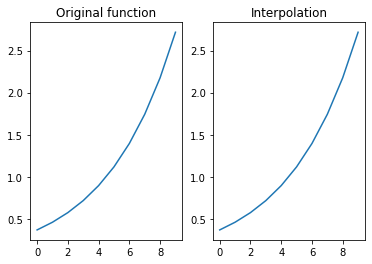

In [119]:
#Testing for the a smooth function on [-1, 1] with equidistant nodes
x = np.linspace(-1, 1, 10)
y = smooth(x)
test = lagInterp(x, y, np.linspace(-1,1,10))
plt.subplot(1,2,1)
plt.plot(y)
plt.title("Original function")

plt.subplot(1,2,2)
plt.plot(test)
plt.title("Interpolation")

Text(0.5, 1.0, 'Interpolation')

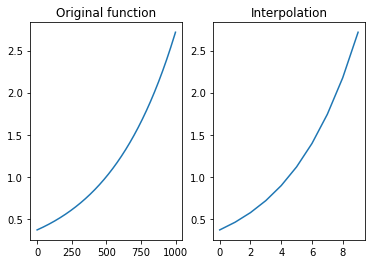

In [124]:
#Testing for the a smooth function on [-1, 1] with Chebyshev nodes
x = chebyshev(10)
y = smooth(x)
test = lagInterp(x, y, np.linspace(-1,1,10))
y_true = smooth(np.linspace(-1,1,1000))

plt.subplot(1,2,1)
plt.plot(y_true)
plt.title("Original function")

plt.subplot(1,2,2)
plt.plot(test)
plt.title("Interpolation")

In [139]:
#Implementing for the Runge function on the interval [-5,5] for n=10
n = 10
x_cheb = phi([-5, 5], chebyshev(n))
y_cheb = runge(x_cheb)
eval_cheb = np.linspace(-5,5,100)
cheb = lagInterp(x_cheb, y_cheb, eval_cheb)

x_equi = np.linspace(-5,5, n)
y_equi = runge(x_equi)
eval_equi = np.linspace(-5,5,100)
equi = lagInterp(x, y, eval_equi)

x_true = np.linspace(-5,5,1000)
y_true = runge(x_true)

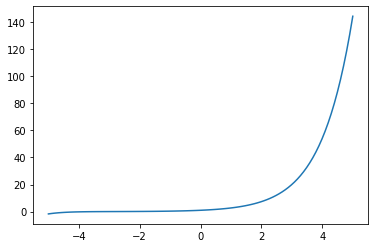

In [140]:
plt.plot(eval_equi, equi)
#We see that the interpolation on equidistant nodes diverges

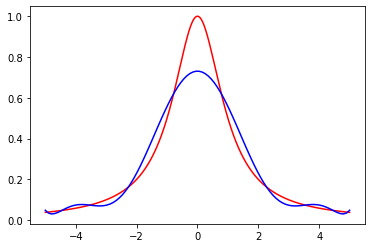

In [141]:
plt.plot(x_true, y_true, 'r',  x_test, cheb, 'b')
#CHebyshev nodes converge

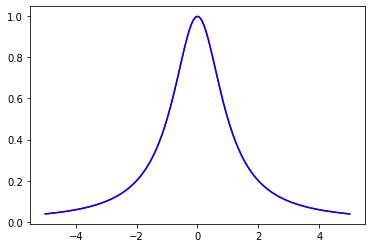

In [142]:
#If we increase n:
#Implementing for the Runge function on the interval [-5,5] for n=10
n = 100
x_cheb = phi([-5, 5], chebyshev(n))
y_cheb = runge(x_cheb)
eval_cheb = np.linspace(-5,5,100)
cheb = lagInterp(x_cheb, y_cheb, eval_cheb)

x_equi = np.linspace(-5,5, n)
y_equi = runge(x_equi)
eval_equi = np.linspace(-5,5,100)
equi = lagInterp(x, y, eval_equi)

x_true = np.linspace(-5,5,1000)
y_true = runge(x_true)
plt.plot(x_true, y_true, 'r',  x_test, cheb, 'b')
#We get good convergence at high n

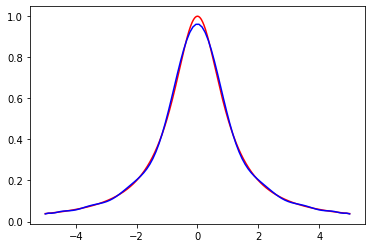

In [143]:
#At a minor increase in n n=20:
n = 20
x_cheb = phi([-5, 5], chebyshev(n))
y_cheb = runge(x_cheb)
eval_cheb = np.linspace(-5,5,100)
cheb = lagInterp(x_cheb, y_cheb, eval_cheb)

x_equi = np.linspace(-5,5, n)
y_equi = runge(x_equi)
eval_equi = np.linspace(-5,5,100)
equi = lagInterp(x, y, eval_equi)

x_true = np.linspace(-5,5,1000)
y_true = runge(x_true)
plt.plot(x_true, y_true, 'r',  x_test, cheb, 'b')
#We start to get good performance

In [144]:
#Problem 1b
def f_1(x):
    return np.cos(2*np.pi*x)
    
def f_2(x):
    return (np.exp(3*x))*np.sin(2*x)

In [366]:
def infNorm(function, interpolation):
    return np.max(np.abs(function - interpolation))

def twoNorm(function, interpolation, interval):
    #print("This is function", function)
    #print("This is interpolation", interpolation)
    return (np.sqrt(interval[1]-interval[0])/np.sqrt(len(function)))*((np.sum((function-interpolation)**2))**2)

n =  1
n =  2
n =  3
n =  4
n =  5
n =  6
n =  7
n =  8
n =  9
n =  10
n =  11
n =  12
n =  13
n =  14
n =  15
n =  16
n =  17
n =  18
n =  19
n =  20
n =  21
n =  22
n =  23
n =  24


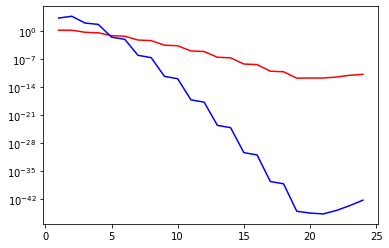

In [403]:
#Making estimated error plots
nVals = np.arange(1, 25, 1)

iNorm = []
tNorm = []
#For function f_1
for n in nVals:
    print("n = ", n)
    nLarge = 100*n
    
    x = np.linspace(0, 1, n)
    y = f_1(x)
    manyPoints = np.linspace(0, 1,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    iNorm += [infNorm(f_1(manyPoints), interpolation)]
    tNorm += [twoNorm(f_1(manyPoints), interpolation, [0,1])]
    

plt.semilogy(nVals, iNorm, 'r', nVals, tNorm, 'b')

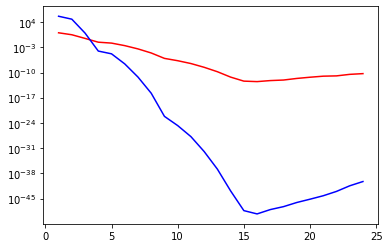

In [404]:
#For function f_2
iNorm = np.array([])
tNorm = np.array([])
for n in nVals:
    nLarge = 100*n
    x = np.linspace(0, np.pi/4, n)
    y = f_2(x)
    manyPoints = np.linspace(0, np.pi/4,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    tNorm = np.append(tNorm,twoNorm(f_2(manyPoints), interpolation, [0,1]))
    iNorm = np.append(iNorm,infNorm(f_2(manyPoints), interpolation))
                              


plt.semilogy(nVals, iNorm, 'r', nVals, tNorm, 'b')

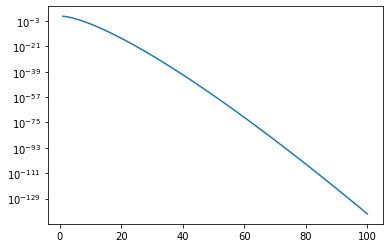

In [167]:
#Calculating for well known error bound
def error_bound_f_1(n):
    return np.pi**(n+1)/((2**n)*np.math.factorial(n+1))

n = np.linspace(1,100, 100)
vec_1 = np.vectorize(error_bound_f_1)
plt.semilogy(n, vec_1(n))

In [382]:
#Problem c
def pieceWise(numberOfSubintervals, interval, function, nodes=5):
    solution = np.array([])
    functionPoints = np.array([])
    subIntervals = np.linspace(interval[0], interval[1], numberOfSubintervals)
    for i in range(1, len(subIntervals)):
        x = np.linspace(subIntervals[i-1],subIntervals[i],nodes+1)
        y = function(x)
        interpolation = lagInterp(x, y, np.linspace(subIntervals[i-1],subIntervals[i],nodes*10))
        subIntPoints = np.linspace(subIntervals[i-1],subIntervals[i],nodes*10)
        solution = np.append(solution, interpolation)
        functionPoints = np.append(functionPoints, subIntPoints)
    return solution, functionPoints, infNorm(function(functionPoints), solution), twoNorm(function(functionPoints), solution, interval)

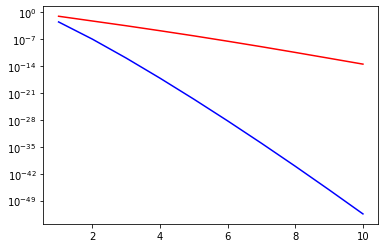

In [385]:
#For n = [1, ..10], we observe the difference in n for K=5 for the interval [0,1] and the function f_1
infList = np.array([])
twoList = np.array([])
n_vals = np.arange(1, 11, 1)

for n in n_vals:
    _, _, infl, twol = pieceWise(8, [0,1], f_1, n)
    infList = np.append(infList, infl)
    twoList = np.append(twoList, twol)
plt.semilogy(n_vals, infList, 'r', n_vals, twoList, 'b')

In [36]:
#Fixing n=10, we observe the the norm as k goes to infinity
normList = np.array([])
kVals = np.arange(2, 21)
for k in kVals:
    normList = np.append(normList, pieceWise(k, [0,1], f_1, 10))
    print("We are on k=", k)

We are on k= 2
We are on k= 3
We are on k= 4
We are on k= 5
We are on k= 6
We are on k= 7
We are on k= 8
We are on k= 9
We are on k= 10
We are on k= 11
We are on k= 12
We are on k= 13
We are on k= 14
We are on k= 15
We are on k= 16
We are on k= 17
We are on k= 18
We are on k= 19
We are on k= 20


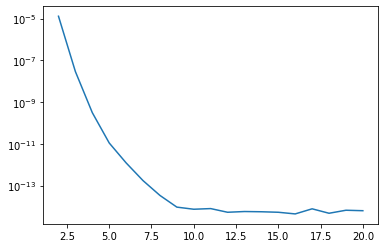

In [37]:
plt.semilogy(kVals, normList)

Text(0.5, 1.0, 'Piecewise method')

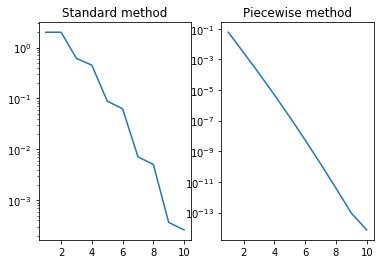

In [38]:
#Comparing the methods in b) and c) for k=8
normListStandard = np.array([])
normListPiecewise = np.array([])
nVals = np.arange(1,11, 1)
for n in nVals:
    normListPiecewise = np.append(normListPiecewise, pieceWise(8, [0,1], f_1, n))
    
    nLarge = 100*n
    x = np.linspace(0, 1, n)
    y = f_1(x)
    manyPoints = np.linspace(0, 1,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    normListStandard = np.append(normListStandard, infNorm(f_1(manyPoints), interpolation))

plt.subplot(1,2,1)
plt.semilogy(nVals, normListStandard)
plt.title("Standard method")

plt.subplot(1,2,2)
plt.semilogy(nVals, normListPiecewise)
plt.title("Piecewise method")

In [178]:
import autograd.numpy as np   # Thinly-wrapped version of Numpy
from autograd import grad

In [72]:
#Problem d

def interp(x, eta, function):
    poly = 0
    for i in range(len(x)):
        li = 1
        for j in range(len(x)):
            if(i==j):
                continue
            if((x[i]-x[j])==0.0):
                print("Divide by 0 at",i,j)
            li = li*((eta-x[j])/(x[i]-x[j]))
        poly += li*function(x[i])
    return poly
        

def cost(x, eta, interval, function):
    val = 0
    for i in range(len(eta)):
        val += (function(eta[i])-interp(x, eta[i], function))**2
    return ((interval[1]-interval[0])/len(eta))*val

In [103]:
x = np.linspace(0, 1, 10)
eta = np.random.uniform(0,1,100)
cost_test = cost(x, eta, [0,1], f_1)

In [98]:
grad_cost = grad(cost, 0)

In [99]:
grad_cost_test = grad_cost(x, eta, [0,1], f_1)

In [104]:
cost_test

1.0455434743403324e-08

In [368]:
def new_gradient_descent(x, eta, interval, function, max_iter = 40, tol = 1e-7):
    c = 1e-4
    gradient = grad(cost, 0)
    p_k = -(gradient(x, eta, interval, function))
    
    norm_p_k = np.linalg.norm(p_k)
    norm_list = [norm_p_k]
    while norm_p_k>tol and max_iter > 0:
        alpha = 10
        print("This is norm", norm_p_k)
        print("This is x", x)
        rhs = (cost(x, eta, interval, function)+c*alpha*((-p_k.T)@p_k))
        while(cost(x+alpha*p_k, eta, interval, function))>rhs:
            print("We are in backtrack", alpha)
            alpha = alpha*0.5
            rhs = (cost(x, eta, interval, function)+c*alpha*((-p_k.T)@p_k))
            
        
        x = x + alpha*p_k
        p_k = -(gradient(x, eta, interval, function))
        norm_p_k = np.linalg.norm(p_k)
        norm_list += [norm_p_k]
        max_iter-=1
    return x, norm_list

In [356]:
eta = np.linspace(0, 1, 1000)
x = np.linspace(0,1,6)
t = np.random.uniform(0,1,10)

In [388]:
interp_gd, grad_val = new_gradient_descent(x, eta, [0,1], f_1)
#We can conclude that starting at equidistant nodes leaves us very close to the answer, while
#starting at random nodes gives us some room for improvent

This is norm 0.01981713071199395
This is x [0.  0.2 0.4 0.6 0.8 1. ]
We are in backtrack 10
This is norm 0.011293259281385934
This is x [0.06523896 0.17512434 0.39416364 0.60583636 0.82487566 0.93476104]
We are in backtrack 10
This is norm 0.0027536820303761065
This is x [0.02630284 0.16682332 0.39111524 0.60888476 0.83317668 0.97369716]
We are in backtrack 10
This is norm 0.0007046862319154068
This is x [0.03572056 0.16830963 0.38914498 0.61085502 0.83169037 0.96427944]
This is norm 0.0007198623234771688
This is x [0.03226406 0.17063612 0.386412   0.613588   0.82936388 0.96773594]
We are in backtrack 10
This is norm 0.00024958345956810774
This is x [0.03463169 0.17101488 0.38555855 0.61444145 0.82898512 0.96536831]
This is norm 0.0002385860168377575
This is x [0.03360082 0.1715374  0.38422481 0.61577519 0.8284626  0.96639918]
This is norm 0.0003066797826560733
This is x [0.03506698 0.17170765 0.38340777 0.61659223 0.82829235 0.96493302]
We are in backtrack 10
This is norm 8.5528435901

In [389]:
interp_gd

array([0.03419905, 0.17179472, 0.38221187, 0.61778813, 0.82820528,
       0.96580095])

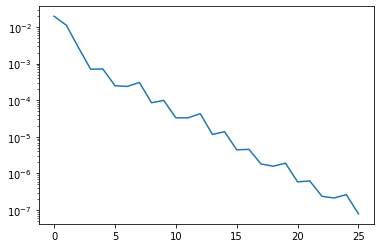

In [390]:
plt.semilogy(grad_val)

In [224]:
#Testing with runge function:
eta = np.linspace(-5, 5, 100)
x = np.linspace(-5,5,5)
y, grad_val = new_gradient_descent(x, eta, [-5,5], runge)

This is norm 0.9610693170169878
This is x [-5.  -2.5  0.   2.5  5. ]
We are in backtrack 10
This is norm 0.4644465595347206
This is x [-2.77111660e+00 -5.06471376e+00 -6.00376953e-17  5.06471376e+00
  2.77111660e+00]
We are in backtrack 10
We are in backtrack 5.0
This is norm 0.14871165731289815
This is x [-3.24551248e+00 -4.39460616e+00  3.34140945e-15  4.39460616e+00
  3.24551248e+00]
We are in backtrack 10
This is norm 0.08220535453230285
This is x [-2.79302274e+00 -4.66236072e+00  6.45944954e-14  4.66236072e+00
  2.79302274e+00]
We are in backtrack 10
We are in backtrack 5.0
This is norm 0.07135612168310809
This is x [-2.84835598e+00 -4.52798770e+00  5.86702351e-13  4.52798770e+00
  2.84835598e+00]
We are in backtrack 10
We are in backtrack 5.0
This is norm 0.06098933867878639
This is x [-2.83208838e+00 -4.65307533e+00  5.37066583e-12  4.65307533e+00
  2.83208838e+00]
We are in backtrack 10
We are in backtrack 5.0
This is norm 0.05286689659458491
This is x [-2.83251809e+00 -4.54526

KeyboardInterrupt: 

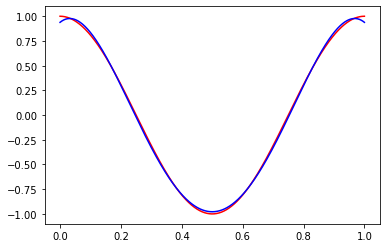

In [392]:
#Plotting the interpolation function versus the true function

x_true = np.linspace(0,1,1000)
y_true = f_1(x_true)
plt.plot(x_true, y_true, 'r',  eta, interp(interp_gd, eta, f_1), 'b')

In [397]:
#Adapting the piecewise function for gradient descent
#x, eta, interval, function, max_iter = 40, tol = 1e-7
def pieceWise_gd(numberOfSubintervals, interval, function, nodes=4):
    solution = np.array([])
    functionPoints = np.array([])
    subIntervals = np.linspace(interval[0], interval[1], numberOfSubintervals)
    for i in range(1, len(subIntervals)):
        x = np.linspace(subIntervals[i-1],subIntervals[i],nodes+1)
        eta = np.linspace(interval[0], interval[1], 100)
        x, _ = new_gradient_descent(x, eta,[subIntervals[i-1], subIntervals[i]] , function, 15, 1e-5)      
        y = function(x)
        interpolation = lagInterp(x, y, np.linspace(subIntervals[i-1],subIntervals[i],nodes*10))
        subIntPoints = np.linspace(subIntervals[i-1],subIntervals[i],nodes*10)
        solution = np.append(solution, interpolation)
        functionPoints = np.append(functionPoints, subIntPoints)
    return solution, functionPoints, infNorm(function(functionPoints), solution), twoNorm(function(functionPoints), solution, interval)

In [398]:
#Test of piecewise gd
solution, func_points, iNorm, tNorm = pieceWise_gd(8, [0,1], f_1)

This is norm 66.24253194694269
This is x [0.         0.03571429 0.07142857 0.10714286 0.14285714]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
We are in backtrack 0.625
We are in backtrack 0.3125
We are in backtrack 0.15625
We are in backtrack 0.078125
This is norm 347.8280743962499
This is x [0.87654472 1.03581585 1.20340045 1.37992421 1.56616372]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
We are in backtrack 0.625
We are in backtrack 0.3125
We are in backtrack 0.15625
We are in backtrack 0.078125
We are in backtrack 0.0390625
We are in backtrack 0.01953125
This is norm 200.82268722756228
This is x [-0.93570452 -0.65353418 -0.33256375  0.03804205  0.45261804]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
This is norm 19.703250389222152
This is x [13.80194366 27.65935838 46.51571832 66.48889138 90.58870511]
We are in backtrack 10
This

KeyboardInterrupt: 

In [378]:
#Compare results for different values of n for f_1
n_vals = np.arange(1, 6, 1)

error_equidistant=np.array([])
error_chebishev = np.array([])
error_optimised = np.array([])

eta = np.linspace(0,1, 1000)

#For lagrangian
for n in n_vals:
    print("This is n", n)
    x = np.linspace(0,1,n)
    cheb = phi([0, 1], chebyshev(n))
    optimal, _ = new_gradient_descent(x, eta, [0,1], f_1)
    
    evalu = np.linspace(0,1, 100)
    
    interp_equidistant = lagInterp(x, f_1(x), evalu)
    interp_chebishev = lagInterp(x, f_1(cheb), evalu)
    interp_optimal = lagInterp(x, f_1(optimal), evalu)
    
    error_equidistant = np.append(error_equidistant, twoNorm(f_1(evalu), interp_equidistant, [0,1]))
    error_chebishev = np.append(error_chebishev, twoNorm(f_1(evalu), interp_chebishev, [0,1]))
    error_optimised = np.append(error_optimised, twoNorm(f_1(evalu), interp_optimal, [0,1]))

This is n 1
This is n 2
This is n 3
This is norm 1.5368359502799604
This is x [0.  0.5 1. ]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
We are in backtrack 0.625
We are in backtrack 0.3125
We are in backtrack 0.15625
This is norm 0.05637546665929625
This is x [0.08489899 0.5        0.91510101]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
We are in backtrack 0.625
We are in backtrack 0.3125
We are in backtrack 0.15625
This is norm 0.005643551514175448
This is x [0.08178466 0.5        0.91821534]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
We are in backtrack 0.625
We are in backtrack 0.3125
We are in backtrack 0.15625
This is norm 0.0005642820879337073
This is x [0.08209643 0.5        0.91790357]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
We are in backtrack 0.625
We are in backtrac

This is norm 4.818575723123623e-05
This is x [0.03604898 0.18243995 0.5        0.81756005 0.96395102]
We are in backtrack 10
This is norm 3.0395108279362628e-05
This is x [0.03587865 0.18243662 0.5        0.81756338 0.96412135]
We are in backtrack 10
This is norm 1.91751442186521e-05
This is x [0.03598609 0.1824348  0.5        0.8175652  0.96401391]
We are in backtrack 10
This is norm 1.2094957484563135e-05
This is x [0.03591831 0.18243375 0.5        0.81756625 0.96408169]
We are in backtrack 10
This is norm 7.62945007965565e-06
This is x [0.03596107 0.18243318 0.5        0.81756682 0.96403893]
We are in backtrack 10
This is norm 4.812341784780731e-06
This is x [0.03593409 0.18243283 0.5        0.81756717 0.96406591]
We are in backtrack 10
This is norm 3.0354988247512805e-06
This is x [0.03595111 0.18243265 0.5        0.81756735 0.96404889]
We are in backtrack 10
This is norm 1.9146711652547074e-06
This is x [0.03594037 0.18243254 0.5        0.81756746 0.96405963]
We are in backtrack 1

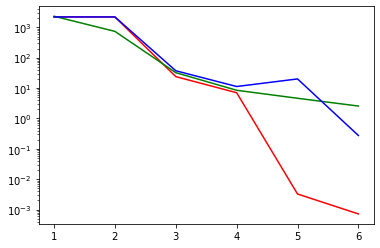

In [379]:
plt.semilogy(n_vals, error_equidistant, 'r', n_vals, error_chebishev,'g', n_vals, error_optimised, 'b')
#plt.plot(n_vals, error_equidistant)

In [ ]:
n_vals = np.arange(1, 6, 1)

error_equidistant=np.array([])
error_chebishev = np.array([])
error_optimised = np.array([])

eta = np.linspace(0,1, 1000)

#For piecewise
for n in n_vals:
    print("This is n", n)
    x = np.linspace(0,1,n)
    cheb = phi([0, 1], chebyshev(n))
    optimal, _ = new_gradient_descent(x, eta, [0,1], f_1)
    
    evalu = np.linspace(0,1, 100)
    
    numberOfSubintervals, interval, function, nodes=5
    _, _, _, equi_norm = pieceWise(8, [0,1], f_1, n)
    _, _, _, cheb_norm= pieceWise(8, [0,1], f_1, n)
    _, _, _, opti_norm= pieceWise(8, [0,1], f_1, n)
    
    error_equidistant = np.append(error_equidistant, twoNorm(f_1(evalu), interp_equidistant, [0,1]))
    error_chebishev = np.append(error_chebishev, twoNorm(f_1(evalu), interp_chebishev, [0,1]))
    error_optimised = np.append(error_optimised, twoNorm(f_1(evalu), interp_optimal, [0,1]))

In [ ]:
#Compare results for different values of n for f_2
n_vals = np.arange(2, 10, 1)

error_equidistant=np.array([])
error_chebishev = np.array([])
error_optimised = np.array([])

eta = np.linspace()

#For lagrangian
for n in n_vals:
    x = np.linspace(0,1,n)
    cheb = phi([0, 1], chebyshev(n))
    optimal, _, _ = new_gradient_descent(x, eta, [0,1], 0.1)
    
    interp_equidistant =
    interp_chebishev = 
    interp_optimal =
    
    np.append(error_equidistant, twoNorm(f_1(x), interp, [0,1]))
    np.append(error_chebishev, twoNorm(f_1(x), interp, [0,1]))
    np.append(error_optimised, twoNorm(f_1(x), interp, [0,1]))
    
error_equidistant = np.array([])
error_chebishev = np.array([])
error_optimised = np.array([])
    
#For piecewise
for n in n_vals:
    x = np.linspace(0,1,n)
    cheb = phi([0, 1], chebyshev(n))
    optimal, _, _ = gradient_descent(x, eta, [0,1], 0.1)
    
    interp_equidistant =
    interp_chebishev = 
    interp_optimal =
    
    np.append(error_equidistant, twoNorm(f_1(x), interp, [0,1]))
    np.append(error_chebishev, twoNorm(f_1(x), interp, [0,1]))
    np.append(error_optimised, twoNorm(f_1(x), interp, [0,1]))

In [ ]:
#Compare results for different values of n for runge
n_vals = np.arange(2, 10, 1)

error_equidistant=np.array([])
error_chebishev = np.array([])
error_optimised = np.array([])

eta = np.linspace()

#For lagrangian
for n in n_vals:
    x = np.linspace(0,1,n)
    cheb = phi([0, 1], chebyshev(n))
    optimal, _, _ = new_gradient_descent(x, eta, [0,1], 0.1)
    
    interp_equidistant =
    interp_chebishev = 
    interp_optimal =
    
    np.append(error_equidistant, twoNorm(f_1(x), interp, [0,1]))
    np.append(error_chebishev, twoNorm(f_1(x), interp, [0,1]))
    np.append(error_optimised, twoNorm(f_1(x), interp, [0,1]))
    
error_equidistant = np.array([])
error_chebishev = np.array([])
error_optimised = np.array([])
    
#For piecewise
for n in n_vals:
    x = np.linspace(0,1,n)
    cheb = phi([0, 1], chebyshev(n))
    optimal, _, _ = gradient_descent(x, eta, [0,1], 0.1)
    
    interp_equidistant =
    interp_chebishev = 
    interp_optimal =
    
    np.append(error_equidistant, twoNorm(f_1(x), interp, [0,1]))
    np.append(error_chebishev, twoNorm(f_1(x), interp, [0,1]))
    np.append(error_optimised, twoNorm(f_1(x), interp, [0,1]))

In [233]:
a = np.array([1,2, 3,4])
a[:-1]

array([1, 2, 3])

In [239]:
m = np.array([])
for i in range

0.007907054051593435

In [304]:
#e

def psi(x, shape):
    return np.exp(-(shape*x)**2)

def f_aprox(x, shape, eta, function):
    m = np.empty([(len(x)), (len(x))])
    for i in range(len(x)):
        for j in range(len(x)):
            m[i,j] = psi(np.abs(x[i]-x[j]), shape)
    f = function(x)
    w = np.linalg.solve(m,f)
    approx = 0
    for i in range(len(x)):
        approx += w[i]*psi(np.abs(eta-x[i]), shape)
    return approx

def cost2(x, shape, eta, interval, function):
    cost_val = 0
    func_eta = function(eta)
    aprox = np.array([])
    for i in range(len(eta)):
        aprox = np.append(aprox, f_aprox(x, shape, eta[i], function))
    aprox = np.sum((func_eta-aprox)**2)
    return ((interval[1]-interval[0])/len(eta))*aprox
    
def f_aprox_grad(x, shape, eta, function):
    m = np.empty([(len(x)), (len(x))])
    for i in range(len(x)):
        for j in range(len(x)):
            m[i,j] = psi(np.abs(x[i]-x[j]), shape)._value
    f = function(x)
    w = np.linalg.solve(m,f)
    approx = 0
    for i in range(len(x)):
        approx += w[i]*psi(np.abs(eta-x[i]), shape)
    return approx

def cost2_grad(x, shape, eta, interval, function):
    cost_val = 0
    func_eta = function(eta)
    aprox = np.array([])
    for i in range(len(eta)):
        aprox = np.append(aprox, f_aprox_grad(x, shape, eta[i], function))
    aprox = np.sum((func_eta-aprox)**2)
    return ((interval[1]-interval[0])/len(eta))*aprox
    
    
    
    
def f_3(x):
    return (0.75*(np.exp((-(9*x-2)**2)/4)))+np.exp((-(9*x+1)**2)/49)+0.5*np.exp((-(9*x-7)**2)/4)-0.1*np.exp(-(9*x-4)**2)
    

In [292]:
grad_cost_2 = grad(cost2_grad,(0,1))

In [256]:
y = np.linspace(-1,1,5)
shape = 4.0

In [257]:
grad_cost_2(y, shape, eta, [-1, 1], runge)

(array([-1.31204580e-01, -2.02574991e-01,  2.07371048e-16,  2.02574991e-01,
         1.31204580e-01]), array(0.10971655))

In [298]:
def gradient_descent2(x, shape, eta, interval, shrink, function, max_iter = 100, tol = 1e-14):
    x = x
    shape = shape
    c = 10**-4
    gradient = grad(cost2_grad,(0,1))
    combined = gradient(x,shape, eta, interval, function)
    p_k = -np.append(combined[0], combined[1])
    norm_p_k = np.linalg.norm(p_k)
    grad_norm_list = [norm_p_k]
    
    while max_iter>0 and norm_p_k>tol:
        print("We are on iteration", max_iter)
        print("This is shape", shape)
        print("This is p_k", p_k)
        print("This is the norm", norm_p_k)
        print("This is x", x)
        alpha = 100
        #rhs = (cost2(x, shape, eta, interval, function)+c*alpha*((-p_k.T)@p_k))
        #lhs = cost2(x+alpha*p_k[:-1],shape + alpha*p_k[-1], eta, interval, function)
        #print (lhs, rhs)
        while cost2(x+alpha*p_k[:-1],shape + alpha*p_k[-1], eta, interval, function)>(cost2(x, shape, eta, interval, function)+c*alpha*((-p_k.T)@p_k)):
            #print("We are on alpha", alpha)
            alpha = shrink*alpha
        x = x + alpha*p_k[:-1]
        shape = shape + alpha*p_k[-1]
        combined = gradient(x,shape, eta, interval, function)
        p_k = -np.append(combined[0], combined[1])
        norm_p_k = np.linalg.norm(p_k)
        max_iter -= 1
        
        grad_norm_list += [norm_p_k]
    return x, grad_norm_list

In [303]:
x = np.linspace(-1,1,5)
eta = np.linspace(0,1,100)
shape = 4.0
nodes, grads = gradient_descent2(x, shape, eta, [-1,1], -0.5, runge)

We are on iteration 100
This is shape 4.0
This is p_k [ 1.77977344e-05  1.52103376e-03  7.42309346e-01 -4.03622806e-01
 -2.62404679e-01 -1.09717309e-01]
This is the norm 0.8915329223338182
This is x [-1.  -0.5  0.   0.5  1. ]
We are on iteration 99
This is shape 3.9973213547487347
This is p_k [ 9.82597645e-06  8.44355086e-04  5.42350104e-01 -2.02150048e-01
 -2.80738063e-01 -8.97660461e-02]
This is the norm 0.6495235126659463
This is x [-0.99999957 -0.49996287  0.01812279  0.49014593  0.99359364]
We are on iteration 98
This is shape 3.995129800888709
This is p_k [ 5.93526779e-06  7.26765219e-04  4.13930606e-01 -8.27190935e-02
 -2.83253407e-01 -7.62092100e-02]
This is the norm 0.5140251544632127
This is x [-0.99999933 -0.49994225  0.03136376  0.48521062  0.98673968]
We are on iteration 97
This is shape 3.993269224472396
This is p_k [ 3.80167500e-06  8.80005777e-04  3.30054840e-01 -1.60516584e-02
 -2.76155753e-01 -6.65208975e-02]
This is the norm 0.4357541252096316
This is x [-0.99999918 

KeyboardInterrupt: 

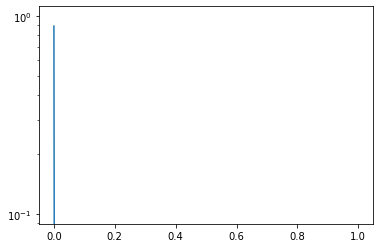

In [300]:
plt.semilogy(grads)

In [348]:
#e
#X contains all the nodes plus a shape parameter at the end
def psi(x, shape):
    return np.exp(-(shape*x)**2)

def f_aprox(x, eta, function):
    m = np.empty([(len(x)-1), (len(x)-1)])
    for i in range(len(x)-1):
        for j in range(len(x)-1):
            m[i,j] = psi(np.abs(x[i]-x[j]), x[-1])
    f = function(x[:-1])
    w = np.linalg.solve(m,f)
    approx = 0
    for i in range(len(x)-1):
        approx += w[i]*psi(np.abs(eta-x[i]), x[-1])
    return approx

def cost2(x, eta, interval, function):
    cost_val = 0
    func_eta = function(eta)
    aprox = np.array([])
    for i in range(len(eta)):
        aprox = np.append(aprox, f_aprox(x, eta[i], function))
    aprox = np.sum((func_eta-aprox)**2)
    return ((interval[1]-interval[0])/len(eta))*aprox
    
def f_aprox_grad(x, eta, function):
    m = np.empty([(len(x)-1), (len(x)-1)])
    for i in range(len(x)-1):
        for j in range(len(x)-1):
            m[i,j] = psi(np.abs(x[i]-x[j]), x[-1])._value
    f = function(x[:-1])
    w = np.linalg.solve(m,f)
    approx = 0
    for i in range(len(x)-1):
        approx += w[i]*psi(np.abs(eta-x[i]), x[-1])
    return approx


def cost2_grad(x, eta, interval, function):
    cost_val = 0
    func_eta = function(eta)
    aprox = np.array([])
    for i in range(len(eta)):
        aprox = np.append(aprox, f_aprox_grad(x, eta[i], function))
    aprox = np.sum((func_eta-aprox)**2)
    return ((interval[1]-interval[0])/len(eta))*aprox
    
    
    
    
def f_3(x):
    return (0.75*(np.exp((-(9*x-2)**2)/4)))+np.exp((-(9*x+1)**2)/49)+0.5*np.exp((-(9*x-7)**2)/4)-0.1*np.exp(-(9*x-4)**2)
    

In [349]:
def new_gradient_descent2(x, eta, interval, function, max_iter = 100, tol = 1e-7):
    c = 1e-4
    gradient = grad(cost2_grad, 0)
    #X contains all the nodes + the shape parameter
    p_k = -(gradient(x, eta, interval, function))
    
    norm_p_k = np.linalg.norm(p_k)
    norm_list = [norm_p_k]
    while norm_p_k>tol and max_iter > 0:
        print("This is max_iter", max_iter)
        alpha = 100
        print("This is norm", norm_p_k)
        print("This is x", x)
        rhs = (cost2(x, eta, interval, function)+c*alpha*((-p_k.T)@p_k))
        while(cost2(x+alpha*p_k, eta, interval, function))>rhs:
            #print("We are in backtrack", alpha)
            alpha = alpha*0.9
            rhs = (cost2(x, eta, interval, function)+c*alpha*((-p_k.T)@p_k))
            
        
        x = x + alpha*p_k
        p_k = -(gradient(x, eta, interval, function))
        norm_p_k = np.linalg.norm(p_k)
        norm_list += [norm_p_k]
        max_iter-=1
    return x, norm_list

In [353]:
x = np.append(np.linspace(-1,1,5),np.array([2.0]))
eta = np.linspace(-1,1,100)
x, norms = new_gradient_descent2(x, eta, [-1,1], runge)

This is max_iter 100
This is norm 0.015523191178582117
This is x [-1.  -0.5  0.   0.5  1.   2. ]
This is max_iter 99
This is norm 0.013850434741906625
This is x [-1.07993681e+00 -4.34759785e-01 -8.20987457e-16  4.34759785e-01
  1.07993681e+00  2.04556564e+00]
This is max_iter 98
This is norm 0.006291774290744119
This is x [-3.50710299e-01 -9.64398743e-01  9.92494111e-15  9.64398743e-01
  3.50710299e-01  1.50356198e+00]
This is max_iter 97
This is norm 0.003112627211049806
This is x [-4.82472006e-01 -1.16565446e+00 -2.66170525e-16  1.16565446e+00
  4.82472006e-01  1.81121188e+00]
This is max_iter 96
This is norm 0.0037818671992306398
This is x [-4.99721530e-01 -1.14478391e+00 -2.17639983e-14  1.14478391e+00
  4.99721530e-01  1.79384248e+00]
This is max_iter 95
This is norm 0.003204745126805046
This is x [-4.95664428e-01 -1.17580185e+00  3.62873254e-15  1.17580185e+00
  4.95664428e-01  1.82940908e+00]
This is max_iter 94
This is norm 0.003244436818601448
This is x [-5.11824129e-01 -1.159

This is max_iter 49
This is norm 0.0005244174531907896
This is x [-5.49812722e-01 -1.21541373e+00 -4.48231882e-04  1.21494592e+00
  5.50650658e-01  1.90144114e+00]
This is max_iter 48
This is norm 0.0005201841976992566
This is x [-5.50667931e-01 -1.21498099e+00  4.40799567e-04  1.21543585e+00
  5.49827805e-01  1.90142552e+00]
This is max_iter 47
This is norm 0.000516103713172016
This is x [-5.49851340e-01 -1.21546637e+00 -4.41189600e-04  1.21500617e+00
  5.50675698e-01  1.90140870e+00]
This is max_iter 46
This is norm 0.0005121614480999906
This is x [-5.50692184e-01 -1.21503969e+00  4.34006631e-04  1.21548723e+00
  5.49865146e-01  1.90139080e+00]
This is max_iter 45
This is norm 0.0005083442291269198
This is x [-5.49887503e-01 -1.21551658e+00 -4.34622095e-04  1.21506345e+00
  5.50699214e-01  1.90137186e+00]
This is max_iter 44
This is norm 0.0005046399671786066
This is x [-5.50715014e-01 -1.21509566e+00  4.27642947e-04  1.21553635e+00
  5.49900223e-01  1.90135200e+00]
This is max_iter 

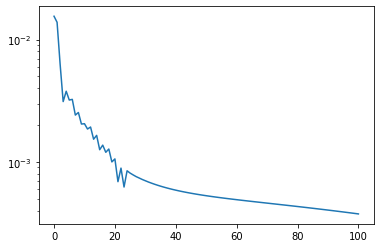

In [354]:
plt.semilogy(norms)